<a href="https://colab.research.google.com/github/WarunaDissanayake1234/Car-Price-Prediction-Model/blob/main/Car_Price_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Dependancies

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection and processing

In [26]:
# loading our dataset
car_dataset = pd.read_csv('/content/car data.csv')

In [27]:
# first 5 rows in the dataset
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [28]:
# shape of the dataset
car_dataset.shape

(301, 9)

In [29]:
car_dataset.describe()
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [30]:
# checking number of missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [31]:
# checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [32]:
# encoding "Fuel_Type" Column
car_dataset.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1,'CNG':2}}, inplace=True)

# encoding "Seller_Type" Column
car_dataset.replace({'Seller_Type':{'Dealer':0, 'Individual':1}}, inplace=True)

# encoding "Fuel_Type" Column
car_dataset.replace({'Transmission':{'Manual':0, 'Automatic':1}}, inplace=True)

In [33]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Slitting the data and Target

In [34]:
X = car_dataset.drop(['Car_Name', 'Selling_Price'], axis=1)
Y = car_dataset['Selling_Price']

Splitting Training and Test Data

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.1, random_state=2)

Model Training

In [36]:
# loading the model Linear Regression
l_r_model = LinearRegression()
l_r_model.fit(X_train, Y_train)

LinearRegression()

Evaluate the model

In [37]:
# Prediction on Training data
training_data_prediction = l_r_model.predict(X_train)

In [20]:
# R squar Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error :",error_score)

R squared error : 0.8799451660493711


Visualize the actual prices and Predicted prices

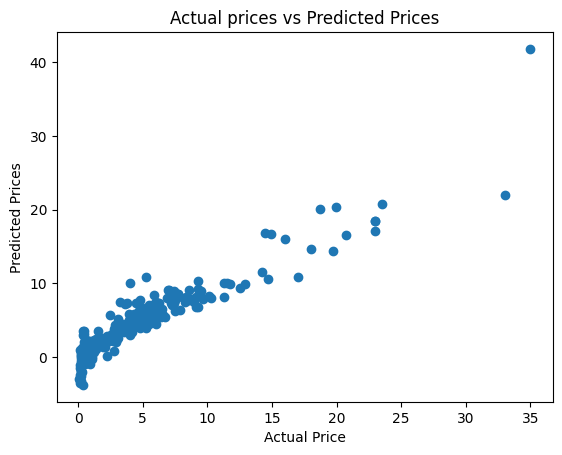

In [38]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Prices")
plt.title("Actual prices vs Predicted Prices")
plt.show()

In [39]:
# Prediction on Test data
test_data_prediction = l_r_model.predict(X_test)

# R squar Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error :",error_score)


R squared error : 0.8365766715027051


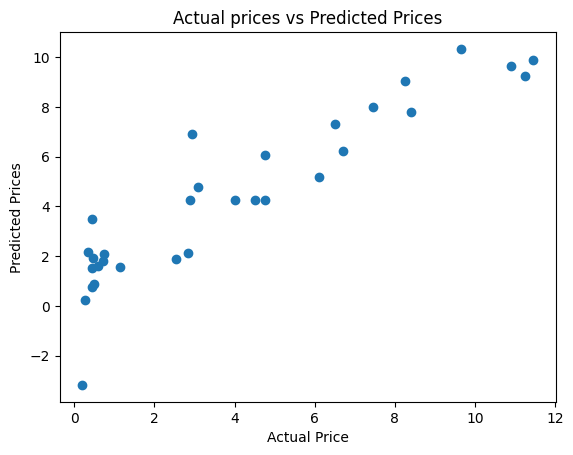

In [40]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Prices")
plt.title("Actual prices vs Predicted Prices")
plt.show()

Lasso Regression

In [41]:
# loading the model Lasso Regression
lasso_regression_model = Lasso()
lasso_regression_model.fit(X_train, Y_train)

Lasso()

Evaluate the model

In [42]:
# Prediction on Training data
training_data_prediction = lasso_regression_model.predict(X_train)

In [43]:
# R squar Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error :",error_score)

R squared error : 0.8427856123435794


Visualize the actual prices and Predicted prices

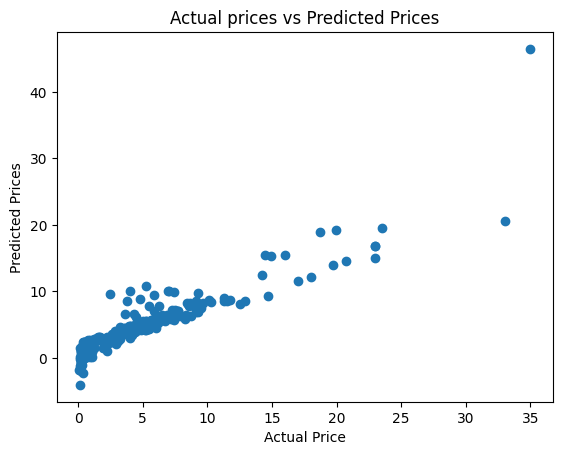

In [44]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Prices")
plt.title("Actual prices vs Predicted Prices")
plt.show()

In [46]:
# Prediction on Test data
test_data_prediction = lasso_regression_model.predict(X_test)

# R squar Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error :",error_score)


R squared error : 0.8709167941173195


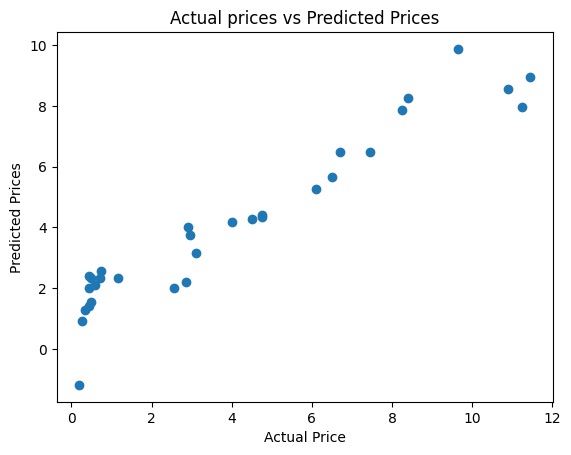

In [47]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Prices")
plt.title("Actual prices vs Predicted Prices")
plt.show()